In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString
from scipy.interpolate import pchip
# cubic Spline interpolation 
from scipy.interpolate import CubicSpline

In [68]:
data1 = np.loadtxt("/content/drive/MyDrive/Fisica/Datos/estrellak.txt") #Se descomenta la estrella que se quiere estudiar
#data1 = np.loadtxt('/content/drive/MyDrive/Fisica/Datos/Arcturus.txt')
#data1 = np.loadtxt('/content/drive/MyDrive/Fisica/Datos/Arcturus_UVES.txt')

datos = data1
x = datos[:,0]#longitud de onda
y = datos[:,1]#flujo

In [69]:
#***************  Parte para realizar el código de bisectores ********************************#
def longitudes_flujo(x,y, y_flujo):
  flujo=np.array([y_flujo for i in x])
  line_1 = LineString(np.column_stack((y,x)))
  line_2 =LineString(np.column_stack((flujo,x)))
  intersection = line_1.intersection(line_2)
  x_corto, y_corto = LineString(intersection).xy
  return y_corto

# Calculo de longitudes promedio para cada valor del flujo 
def longitudes_promedio(x, y, lista_y): 
  #lista_y = np.linspace(y_min, y_max, 5000)
  promedio = np.zeros(len(lista_y))
  
  for i in range(len(lista_y)):
    longitudes= longitudes_flujo(x, y, lista_y[i])
    promedio[i]= np.sum(longitudes)/len(longitudes)
  return promedio
#*********************************************************************************************#


# HD 156026

In [70]:
#Rangos de longitudes de onda 

rangos_lineas_esp =[(200,300),(300,370),(740,900),(1150,1190), (1440,1470), (1755,1780), (1840,1870), (2250,2270), 
                   (2350,2380),(2235,2255),(2550,2600), (3280,3380), (2480,2520),(2890,2920),
                (3020,3050),(3250,3300),(4600,4700),(4700,4800),(3680,3700),(3740,3770),(3999,4020),
                 (3910,3960),(4880,4959),(5080,5110),(4950,5010),(3850,3890)]

flujo_max = np.array([0.87, 0.945, 0.95, 0.945, 0.985, 0.965, 0.979, 0.94, 0.965, 0.93, 0.964, 0.9,0.89, 0.97, 
                   0.99,0.90, 0.945, 0.89, 0.98,  0.99,  0.97, 0.983, 0.8, 0.97, 0.92, 0.985 ])


# **ARCTURUS ALTA RESOLUCIÓN**

In [71]:
#Arcturus

#rangos_lineas_esp =[(2150,2300), (2350,2450), (3400,3550), (4200,4440), (4910,5050), (5659,5700), (5850,5920),
#                   (6780,6850), (6980,7090), (6740,6790), (7500,7580), (9100,9200), (7300,7400), (8100,8300),
#                  (8450,8550), (9000,9100), (12100,12200), (12320,12400), (9900,10100), (10090,10170),
#                  (10645,10700), (10495,10590), (12700,12800), (13100,13200), (12800,13000), (10350,10450),
#                   ]

#arturs 
#flujo_max = np.array([0.9, 0.9, 0.9, 0.9, 0.94, 0.9, 0.9,0.85, 0.91, 0.89, 0.92, 0.9,0.974,
#                    0.943, 0.92, 0.8,0.85, 0.85, 0.89, 0.92, 0.92, 0.9, 0.72, 0.945, 0.95, 0.935])


# ARCTURUS UVES (RESOLUCIÓN MENOR) 

In [72]:
#rangos_lineas_esp=[(10,90), (90,150), (550,650),(910,1050), (1245,1280),(1555,1575), (1645,1665), 
 ##                  (2050,2080), (2140,2180),(2030,2055), (2350,2395), (3100,3150), (2280,2310),
   ##                (2690,2730), (2810,2850), (3050,3090), (4400,4500), (4540,4600), (3480,3500),
    #               (3530,3570),(3799,3820), (3720,3750), (4710,4740), (4890,4910), (4750,4800),
    #               (3650,3700)]
              
#flujo_max = np.array([0.84 , 0.915, 0.843, 0.9, 0.925, 0.87, 0.94, 0.843, 0.9, 0.81, 0.95,0.9,
 #                     0.78, 0.94, 0.93, 0.91, 0.905, 0.85, 0.925, 0.955, 0.92, 0.92, 0.75, 0.88,
 #                     0.94, 0.96  ])

In [74]:
#colores
Cd = '#ff0303' #Rojo 
Fe = '#1900ff' #Azul 
Ti = '#008a35' #Verde
lista_de_colores = np.array([Cd,Fe,Fe,Fe,Ti,Fe,Ti,Fe,Fe,Ti,Fe,Cd,Fe,Fe,Ti,Fe,Ti,Fe,Ti,Ti,Ti,Ti,Fe,Fe,Ti,Fe])

long_onda_natural = np.array([7400.179,7401.6826, 7411.1526, 7418.6662, 7424.5858, 7430.8555, 7432.6704,7440.911,
                             7443.0217,7440.5765, 7447.3931, 7462.309,7445.7485, 7453.9966, 7456.5841,7461.5194,
                             7489.578,7491.6468,7469.938,7471.2131, 7476.3747,7474.8944, 7495.0651,7498.5298, 
                             7496.102,7473.5538]) 

#constante


velocidad_de_la_luz = 300000

label=np.array(['Cr','Fe','','','Ti','','','','','','','','','','','','','','','','','','','','',''])

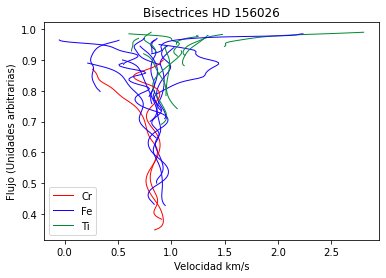

In [75]:

velocidad =[]
flux =[]
for i in range(len(rangos_lineas_esp)):
  min_ran = rangos_lineas_esp[i][0]
  max_ran = rangos_lineas_esp[i][1]
  eje_cubic= CubicSpline(x[min_ran:max_ran],y[min_ran:max_ran],bc_type='not-a-knot', extrapolate=None)
  eje_x = np.linspace(x[min_ran:max_ran].min(), x[min_ran:max_ran].max(), num=25000, endpoint=True)
  flujomin = np.min(eje_cubic(eje_x)) + 0.01

  
  flujomax = flujo_max[i]
  flujos = np.linspace(flujomin, flujomax, 100)
  long_average = longitudes_promedio(eje_x,eje_cubic(eje_x), flujos)
  velocidad_estrella = velocidad_de_la_luz*(long_average/long_onda_natural[i]-1)
  velocidad.append(velocidad_estrella[0])
  flux.append(flujos[0])
  plt.plot( velocidad_estrella,flujos,lista_de_colores[i], label=label[i] ,linewidth= 1)
  plt.title('Bisectrices HD 156026')
  plt.xlabel("Velocidad km/s")
  plt.ylabel('Flujo (Unidades arbitrarias)')
  plt.legend()
  df = pd.DataFrame({ 'Velocidad': velocidad,'Flujos': flux,})

plt.savefig("Bisectores_HD156026H.pdf")


In [76]:
df

,Velocidad,Flujos
0,0.909114,0.383204
1,0.817513,0.758284
2,0.862641,0.500314
3,0.937804,0.709471
4,1.056518,0.912359
5,0.553106,0.885590
6,1.047547,0.951018
7,0.906933,0.734860
8,0.791866,0.781274
9,0.905126,0.690775


In [77]:
longitud = [7400.179 , 7401.6826 ,7411.1526 ,7418.6662 ,7424.5858 ,7430.8555, 7432.6704,
 7440.911  ,7443.0217 ,7440.5765 ,7447.3931 ,7462.309 , 7445.7485 ,7453.9966,
 7456.5841 ,7461.5194 ,7489.578  ,7491.6468 ,7469.938 , 7471.2131 ,7476.3747,
 7474.8944 ,7495.0651 ,7498.5298 ,7496.102 , 7473.5538]


In [78]:
df.insert(0, 'λ',longitud)

In [79]:
df

,λ,Velocidad,Flujos
0,7400.1790,0.909114,0.383204
1,7401.6826,0.817513,0.758284
2,7411.1526,0.862641,0.500314
3,7418.6662,0.937804,0.709471
4,7424.5858,1.056518,0.912359
5,7430.8555,0.553106,0.885590
6,7432.6704,1.047547,0.951018
7,7440.9110,0.906933,0.734860
8,7443.0217,0.791866,0.781274
9,7440.5765,0.905126,0.690775


In [80]:
df.to_excel('Datos_Arcturus_UVES.xlsx', index=False)



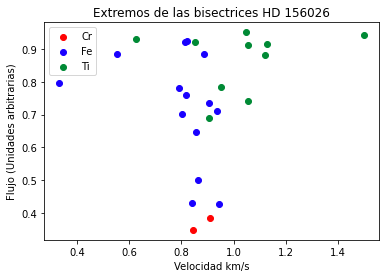

In [81]:

for i in range(26):
  plt.scatter(velocidad[i], flux[i], c= lista_de_colores[i], label =label[i])

plt.legend()
plt.xlabel("Velocidad km/s")
plt.ylabel('Flujo (Unidades arbitrarias)')
plt.title('Extremos de las bisectrices HD 156026')
plt.savefig("HD156026.pdf")
